<a href="https://colab.research.google.com/github/sameersahu473/rp/blob/main/ambient_2area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.misc import face
from scipy.signal import wiener
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
dt1 = pd.read_csv("colored.csv")
dt2 = pd.read_csv("clean.csv")

In [ ]:
dt1.head()

,signal
0,4.091973
1,4.321978
2,3.298262
3,4.069679
4,3.854986


In [4]:
noise = dt1["signal"]

clean = dt2["signal"]

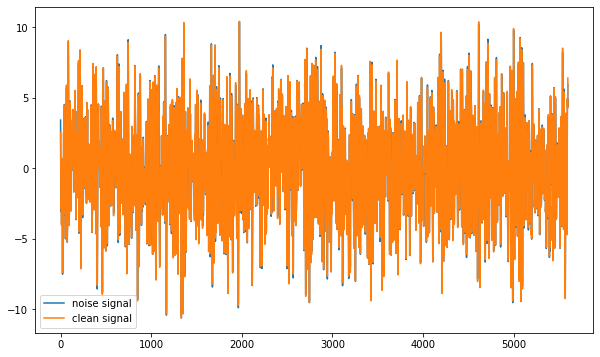

In [5]:


plt.figure(figsize=(10, 6))
plt.plot(noise, label='noise signal')
plt.plot(clean, label='clean signal')

plt.legend(loc='best')
plt.show()


In [8]:
len(noise)

5599

Using weiner filter


In [9]:
!pip install astroML
from astroML.filters import wiener_filter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 4.3 MB/s 


https://www.astroml.org/book_figures_1ed/chapter10/fig_wiener_filter.html

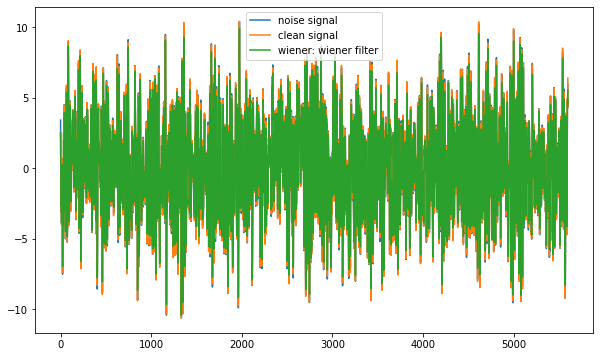

In [10]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(noise, label='noise signal')
plt.plot(clean, label='clean signal')
plt.plot(signal.wiener(noise), label='wiener: wiener filter')

plt.legend(loc='best')
plt.show()

In [ ]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, signal.wiener(noise)))

In [11]:

from sklearn import metrics
print(metrics.mean_squared_error(clean,signal.wiener(noise)))

0.5978131323446945


In [12]:
len(noise)

5599

In [13]:
noise_train = noise[:4000]
noise_test = noise[4000:]

clean_train = clean[:4000]
clean_test = clean[4000:]

using knn regressor

In [14]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=100, weights='uniform')

In [15]:
clf.fit(noise_train.values.reshape(-1,1), clean_train)

KNeighborsRegressor(n_neighbors=100)

In [16]:
clean_pred = clf.predict(noise_test.values.reshape(-1,1))

In [17]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean_test, clean_pred))

In [18]:
res

'-3.029974022 -3.5550908906900003\n-2.093790153 -2.6937781169\n-1.372360771 -1.4462088336500003\n-1.205573949 -1.33913811134\n-1.997153331 -1.4125431037299998\n-3.207577044 -2.37530978484\n-4.133145695 -3.730959253599999\n-3.935554852 -3.89000656318\n-3.336693463 -3.6939247577299996\n-2.772663914 -2.91888546013\n-1.929794226 -2.33591914591\n-0.650896942 -1.4109267091800004\n0.910896688 5.258370000010837e-06\n1.576877368 1.20822048641\n1.23243381 1.62101822606\n1.028383595 0.9840808080299998\n0.829460164 0.88475236621\n0.850728692 0.9304752123000002\n1.1351054 0.9427143679700001\n1.478876162 1.2096276966400001\n2.226360892 1.7157870017999997\n2.26562968 2.07509010307\n0.944203385 1.8257041053400005\n-0.175770376 0.37438013003000004\n-0.247424685 -0.38902599955999995\n-0.201523266 -0.12347038866999999\n0.374718137 -0.01104064990999998\n1.302177165 0.80235573298\n1.652640739 1.6210182260599995\n1.255078082 1.63788048005\n1.162424379 1.0214420988\n1.514733293 1.1214328482\n1.382766757 1.51

In [19]:
clean_pred = clf.predict(noise.values.reshape(-1,1))

In [20]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, clean_pred))


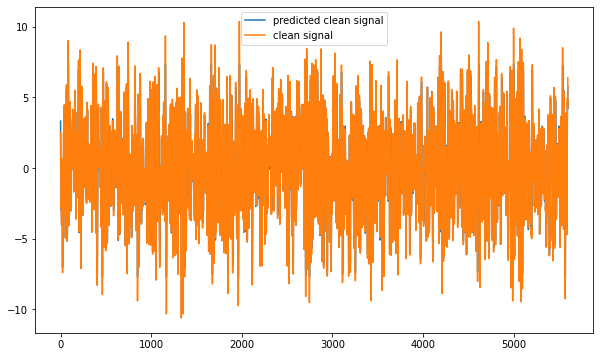

In [21]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(clean_pred, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [22]:
print(metrics.mean_squared_error(clean,clean_pred))

0.6334817617425976


In [23]:
import xgboost as xgb
regressor=xgb.XGBRegressor(eval_metric='rmse')

In [24]:
regressor.fit(noise_train.values.reshape(-1,1), clean_train)

[19:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eval_metric='rmse')

In [25]:
clean_pred = regressor.predict(noise.values.reshape(-1,1))

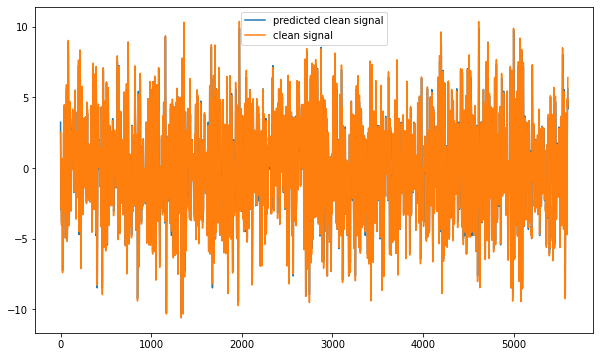

In [26]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(clean_pred, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [27]:

from sklearn import metrics
print(metrics.mean_squared_error(clean,clean_pred))

0.5752293852032708


In [28]:
result_df = pd.DataFrame(clean_pred, columns = ['predicted'])

In [29]:
result_df.to_csv('predicted.csv')